In [1]:
from SeismTool.HSR import hsr
from imp import reload
from obspy import UTCDateTime,read
from SeismTool.io import seism,dataLib
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
reload(dataLib)
reload(seism)
stations =  seism.StationList('hsrStd')
#stations =  seism.StationList(seism.StationList('../stations/201805DXSel2.txt'))
#stations.set('net','*')
#stations.set('compBase','?H')
#stations.set('nameMode','201805DS')
#stations =  seism.StationList(seism.StationList('../stations/XA.Loc.201908V2.txt'))#../stations/XA.Loc.201908.txt'))
stations.set('net','XA')
stations.set('compBase','BH')
stations.set('nameMode','RDDS')
#return

plt.close()
plt.figure(figsize=[25,20])
for station in stations:
    plt.text(station['lo'],station['la'],station['sta'])
#plt.xlim([115.65,115.90])
#plt.ylim([39.06,39.22])
plt.xlim([115.815,115.822])
plt.ylim([39.115,39.128])
plt.savefig('hsrFig/201908Sta.jpg',dpi=200)

In [2]:

T0=UTCDateTime(2019,9,1).timestamp
T3L = [seism.Trace3(seism.getTrace3ByFileName(station.\
    getFileNames(int(T0/86400)*86400,int(T0/86400)*86400),freq=[0.5, 40],delta0=0.01)) for station in stations]
#T3L =[seism.Trace3(t3)for t3 in T3L]
#x3 = T3L[0].cross(T3L[1].slice(T0,T0+3))


In [20]:
reload(hsr)
h=hsr.hsr()
#eL=h.getCatolog(T3L,sta0='PKU60',sta1='PKU87',stations=stations)
eL=h.getCatolog(T3L,sta0='RD002',sta1='RD086',stations=stations,minDis=300)

10.625 195 200


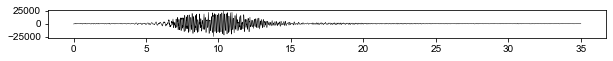

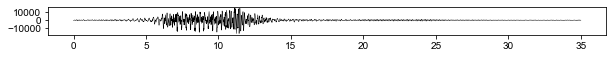

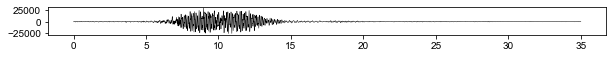

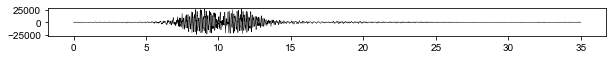

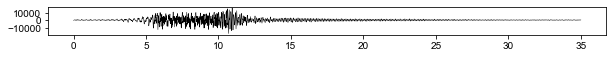

In [28]:

for i in range(5):
    plt.figure(figsize=(10,3))
    plt.subplot(5,1,i+1)
    time0,time1,v0,v1=eL[40+i]
    t3=T3L[0].slice(time0-10,time0+25)
    
    delta = t3.Delta()
    timeL  = np.arange(len(t3.Data()))*delta
    plt.plot(timeL,t3.Data()[:,2],'k',linewidth=0.5)
    plt.savefig('waveform_%d.pdf'%i)

In [17]:
#print(eL)
time0,time1,v0,v1=eL[1]
v_=(v0+v1)/2
V_=v_*0.025
print(v_)
NS=np.sign(time1-time0)
print(NS)
Time0 = time0
time0,time1=[min([time0,time1]),max([time0,time1])]
#print(time0,time1,time1-time0,v1-v0)
#t3L= [  T3.slice(h.MeanTime(T3.slice(time0-40,time1+40))-10,h.MeanTime(T3.slice(time0-40,time1+40))+10)for T3 in T3L]
plt.close()
#line=h.getLine(stations,sta0='PKU28',sta1='SUS47')
line=h.getLine(stations,sta0='RD001',sta1='RD086')
H0=line.h(np.array(stations.loc()).transpose())
L0=line.l(np.array(stations.loc()).transpose())
H=np.abs(H0)+0.01
L=L0.copy()
t3L=[]
for i in range(len(stations)):
    time = Time0+NS*L[i]/V_
    #print(NS*L[i]/V_)
    t3L.append(T3L[i].slice(Time0-40,Time0-20))
count=0
for t3 in t3L: 
    if t3.Data().size>0:
        t3.rotate(25)   
        #t3=T3L[count]
        plt.plot(t3.Data()[:,0]/t3.Data()[:,0].std()*0.001+H[count],'k',linewidth=0.1)
        count+=1
plt.ylim([-0.02,0.15])
plt.savefig('hsrFig/waveform.jpg',dpi=300)
plt.close()
print(time0,time1,v0,v1)    

3.29940055367
-1.0
1567309397.21 1567309405.55 3.2744255306 3.32437557674


In [18]:
reload(hsr)
#h=hsr.hsr()
#h=hsr.hsr(fL0=np.arange(4.5,5.5,0.01))
#h=hsr.hsr(fL0=np.arange(4.5,5.5,0.01))
print(L)
uL  = np.arange(-8000,8000,50)/1000
h=hsr.hsr(fL0=np.arange(4.5,5.5,0.005),uL=uL)
slL = np.arange(-1.001,1,0.01)

slL = 1/uL
#shL = np.arange(-1.001,1,0.01)#np.arange(-1.001,1,0.01)
shL = np.array([0])
#slL = n
print(v_)
specL  = h.getSpecL(t3L,0,f=v_,isNorm=True,oTime=T0)
M = np.array(h.loopSlh(specL,slL,shL,L,H))

[  0.00000000e+00   1.27756600e-05  -8.90704415e-04  -4.08479654e-04
  -2.54535363e-03   3.97558491e-02   3.75390712e-02   3.87975955e-02
   3.77555877e-02   3.65920031e-02   8.09354850e-02   8.00091347e-02
   7.96052656e-02   7.96058919e-02   7.89271297e-02   1.20651513e-01
   1.24808887e-01   1.29002014e-01   1.25411886e-01   1.25470975e-01
   1.62698440e-01   1.64385120e-01   1.60640463e-01   1.62577370e-01
   1.62189446e-01   2.00290489e-01   2.00981853e-01   2.00717518e-01
   2.01150206e-01   2.02432390e-01   2.38029625e-01   2.36470999e-01
   2.36875081e-01   2.36593720e-01   2.80358609e-01   2.78449417e-01
   2.79748218e-01   2.78603831e-01   2.78646949e-01   3.20560303e-01
   3.15649422e-01   3.13764507e-01   3.09872405e-01   3.07897918e-01
   3.61037921e-01   3.60408689e-01   3.59144686e-01   3.57780136e-01
   3.53220009e-01   4.01661758e-01   4.01385607e-01   4.00699728e-01
   3.94387830e-01   3.95000423e-01   4.42003576e-01   4.40594239e-01
   4.39148209e-01   4.37052665e-01

/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/SeismTool/HSR/hsr.py:285: RuntimeWarning: invalid value encountered in multiply
  dtL=sl*L+sh*H
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-package

In [19]:
reload(hsr)
#h=hsr.hsr()
#h=hsr.hsr(fL0=np.arange(0,20,0.05))
#h.plotSSpec(v_,M[:,0],slL,'hsrFig/SSpec.jpg')
h.plotUSpec(v_,M[:,0],'hsrFig/USpec.jpg')
#h.plotSlhAll(M,slL,shL,saveDir='hsrFig/slh/')
#h.plotSlhByF(M,slL,shL,saveDir='hsrFig/slh2/')
#h.plotSlh3D(M,slL,shL,saveDir='hsrFig/slh/')
#h.plotPhaseByF(specL,stations,saveDir='hsrFig/phase2/',sta0='RD002',cmap='rainbow')

4.5
0.0


In [73]:
reload(hsr)
h=hsr.hsr()
l = np.array([0,0.1,0.3,0.5,0.6,0.7])
sL = np.array([0.25,0.5])
phaseL = np.array([0,1])
rL = h.calSum(l,sL=sL,omega=5*np.pi*2,phaseL=phaseL).sum(axis=1)
print(np.angle(rL))
h.calSlowness(rL,l,sL0=[0.2,0.6],loop=100,alpha=0.1,omega=5*np.pi*2)

[ 0.07966471  0.88490061  2.33259698 -2.45157299 -1.62059175 -0.76600028]
3.21270364389
######## [ 0.23241768  0.61192298] [ 1.02894146 -0.01733867] [ 0.05201462 -0.03625014]
0.958653434415
######## [ 0.24250618  0.66007353] [ 1.03367813 -0.02593288] [ 0.06634479 -0.04161516]
0.341774835914
######## [ 0.2432959   0.74329614] [ 1.03467047 -0.04127899] [ 0.07342635 -0.05159666]
0.246816759635
######## [ 0.24293278  0.74612508] [ 1.03414671 -0.08401351] [ 0.07896492 -0.052894  ]
0.293891002295
######## [ 0.24258596  0.74733905] [ 1.02954502 -0.19199458] [ 0.08438737 -0.04984816]
0.699261409865
######## [ 0.2417214   0.74769848] [ 1.00598146 -0.43734595] [ 0.09240391 -0.02635301]
1.66299863821
######## [ 0.2394454   0.74410522] [ 0.94259801 -0.76058071] [ 0.10992487  0.04473674]
2.88844285282
######## [ 0.23934623  0.73476945] [ 0.86023993 -1.05741322] [ 0.11536018  0.16672384]
5.31983142061
######## [ 0.24166494  0.74535325] [ 1.22440938 -1.58441669] [ 0.07570153  0.08405705]
5.4767322169

In [16]:
reload(hsr)
#h=hsr.hsr()
#h=hsr.hsr(fL0=np.arange(4.5,5.5,0.01))
h=hsr.hsr(fL0=np.arange(4.5,5.5,0.01))
sL = np.exp(np.arange(-4,0,0.002))*2
thetaL = np.arange(-0.2,1.2,0.002)*np.pi*2#np.arange(-1.001,1,0.01)
specL  = h.getSpecL(t3L,0,isNorm=False,oTime=T0)
M1 = h.loopSTheta(specL,sL,thetaL,L,H)

4.5
hsrFig/sTheta//4.500.jpg


/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/SeismTool/HSR/hsr.py:304: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(shL,slL,np.abs(m),rasterized=True)


4.51
hsrFig/sTheta//4.510.jpg
4.52
hsrFig/sTheta//4.520.jpg
4.53
hsrFig/sTheta//4.530.jpg
4.54
hsrFig/sTheta//4.540.jpg
4.55
hsrFig/sTheta//4.550.jpg
4.56
hsrFig/sTheta//4.560.jpg
4.57
hsrFig/sTheta//4.570.jpg
4.58
hsrFig/sTheta//4.580.jpg
4.59
hsrFig/sTheta//4.590.jpg
4.6
hsrFig/sTheta//4.600.jpg
4.61
hsrFig/sTheta//4.610.jpg
4.62
hsrFig/sTheta//4.620.jpg
4.63
hsrFig/sTheta//4.630.jpg
4.64
hsrFig/sTheta//4.640.jpg
4.65
hsrFig/sTheta//4.650.jpg
4.66
hsrFig/sTheta//4.660.jpg
4.67
hsrFig/sTheta//4.670.jpg
4.68
hsrFig/sTheta//4.680.jpg
4.69
hsrFig/sTheta//4.690.jpg
4.7
hsrFig/sTheta//4.700.jpg
4.71
hsrFig/sTheta//4.710.jpg
4.72
hsrFig/sTheta//4.720.jpg
4.73
hsrFig/sTheta//4.730.jpg
4.74
hsrFig/sTheta//4.740.jpg
4.75
hsrFig/sTheta//4.750.jpg
4.76
hsrFig/sTheta//4.760.jpg
4.77
hsrFig/sTheta//4.770.jpg
4.78
hsrFig/sTheta//4.780.jpg
4.79
hsrFig/sTheta//4.790.jpg
4.8
hsrFig/sTheta//4.800.jpg
4.81
hsrFig/sTheta//4.810.jpg
4.82
hsrFig/sTheta//4.820.jpg
4.83
hsrFig/sTheta//4.830.jpg
4.84
hsrFig/s

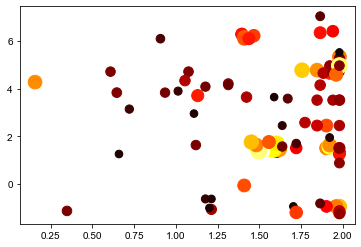

In [ ]:
reload(hsr)
#h=hsr.hsr()
#3h=hsr.hsr(fL0=np.arange(4.5,5.5,0.01))
h=hsr.hsr(fL0=np.arange(4.5,5.5,0.01))
h.plotSlhByF(M1,sL,thetaL,saveDir='hsrFig/sTheta2/',xlabel='theta',ylabel='slowness')
h.plotSlh3D(M1,sL,thetaL,saveDir='hsrFig/sTheta2/',xlabel='theta',ylabel='slowness')

In [6]:

reload(hsr)
iL=[]
for i in H.argsort():
    if t3L[i].Data().std()>1 and np.abs(L[i])<1 :
        iL.append(i)
fL=np.array([3.2,5,6.4,9.6,12.8,16,19.2])
around = np.arange(0.9,1.1,0.01)
fLM=fL.reshape([1,-1])*around.reshape([-1,1])
h= hsr.hsr(fL0=fLM.reshape(-1))
specL = h.getSpecL(t3L,0,f=v_,isNorm=False)
print(v_)
AL = np.abs(np.array(specL)).reshape([len(specL),len(around),len(fL)]).max(axis=1)
strL='k'*10
plt.close()
plt.figure(figsize=[12,20])
for fIndex in np.arange(6):
    #fIndex=3
    #plt.close()
    plt.subplot(6,1,fIndex+1)
    plt.plot(H[iL],np.array(np.abs(specL[iL,fIndex])),'.'+strL[fIndex])
    plt.title(float(fL[fIndex]))
    #plt.ylim([7,15])
    plt.xlim([-0.01,0.1])
plt.savefig('hsrFig/d-A.jpg',dpi=300)
plt.close()

/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.25777551522


In [ ]:
t3L=[]
staIndex=0
Time0 = h.meanTime(T3L[staIndex].slice(time0-40,time0+40))
D=np.arange(0,5,0.1)
for i in range(len(D)):
    time = Time0+D[i]/V_
    print(D[i]/V_)
    t3L.append(T3L[staIndex].slice(time-20,time+20))
iL = range(len(D))
fL=np.array([3.2,5,6.4,9.6,12.8,16,19.2])
around = np.arange(0.9,1.1,0.01)
fLM=fL.reshape([1,-1])*around.reshape([-1,1])
h= hsr.hsr(fL0=fLM.reshape(-1))
specL = h.getSpecL(t3L,0,f=v_,isNorm=False)
print(v_)
AL = np.abs(np.array(specL)).reshape([len(specL),len(around),len(fL)]).max(axis=1)
strL='k'*10
plt.close()
plt.figure(figsize=[12,20])
for fIndex in np.arange(6):
    #fIndex=3
    #plt.close()
    plt.subplot(6,1,fIndex+1)
    plt.plot(D[iL],np.array(np.abs(specL[iL,fIndex])),'.'+strL[fIndex])
    plt.title(float(fL[fIndex]))
    #plt.ylim([7,15])
    plt.xlim([-0.01,0.1])
plt.savefig('hsrFig/d-A.jpg',dpi=300)
plt.close()

In [60]:
plt.close()
plt.plot(np.abs(specL.sum(axis=0)),rasterized=True)
plt.savefig('hsrFig/specSum.jpg',dpi=300)


In [ ]:
reload(hsr)
h=hsr.hsr()
line=h.getLine(stations,sta0='PKU28',sta1='SUS47')

In [ ]:
#print(stations.loc())
H0=line.h(np.array(stations.loc()).transpose())
L0=line.l(np.array(stations.loc()).transpose())
H=np.abs(H0)
L=L0.copy()
plt.close()
plt.plot(H,L,'.')
plt.savefig('hsrFig/lh.jpg',dpi=300)

In [ ]:
sl=1/3
sh=0.01
dtL=sl*L+sh*H
specL=h.ShiftDt(specL,dtL)

In [ ]:
reload(hsr)
h=hsr.hsr(fL0=np.arange(5,5.35,0.005))
slL = np.arange(-1.001,1,0.01)
shL = np.arange(-1.001,1,0.01)#np.arange(-1.001,1,0.01)
specL  = h.getSpecL(t3L,1)
M = h.loopSlh(specL,slL,shL,L,H)



/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
reload(hsr)
h=hsr.hsr(fL0=np.arange(4.5,5.5,0.005))
plt.close()
#print(np.array(M).shape,M[1][1])
#h.plotSlhByF(M,slL,shL,saveDir='hsrFig/slh/')
#h.plotSlhAll(M,slL,shL,saveDir='hsrFig/slh/')
h.plotSlh3D(M,slL,shL,saveDir='hsrFig/slh/')


[149 149 172 172 172 172 171 178 178 197 197  42  42 143  16  16  76  29
 157 102 157 157   1  75  74  47  74  91  22  22  89 181 181 181 153  59
 142 174 185  17 105  53 162  31  64  64  68 115  31 105 105 105 185 172
 178 178 177 177  61  61  61 166 166 148 147 147 147 147 137 137 137  23
  71 181 134  89  89 199 147 114 114 123 123 123 198   3   3  84  84  84
  84 104 104 104  94  34  32  32  32 168 162  33 161  74 141 141  45 152
  66   2  69  69  27  99  76 170  44  68  69 200   7  13  13  13 179  34
  34  34  26  17  17  17  18  34  58  28  99  88  24 184  64  69 157 157
 145 145 145  97  95 176 176 142  34  34  36 168 168 167 106  59  16 106
  64 152 152 198 197 152 198  19  92  12  12 158  82  82 158 157 156 156
 169 156  55  55 122   9   9 138 138   8   8  33  33 196  20   3 196 169
 169  58]


/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/matplotlib/collections.py:923: ComplexWarning: Casting complex values to real discards the imaginary part
  self._transforms[:, 0, 0] = scale
/home/jiangyr/conda/envs/seismToolNew/lib/python3.6/site-packages/matplotlib/collections.py:924: ComplexWarning: Casting complex values to real discards the imaginary part
  self._transforms[:, 1, 1] = scale


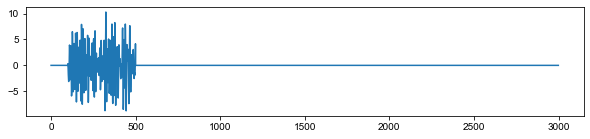

In [72]:
from scipy import signal
fs =1
f0=1/10
f1=1/160
timeL = np.arange(3000.0)
fL    = timeL/timeL.max()*fs

data = timeL*0

plt.figure(figsize=[10,2])
for i in range(100):
    data[1000:2000]+=np.sin(2*np.pi*f1*timeL[1000:2000]*(np.random.rand()*0.8+0.6))*np.random.rand()
#data[1000:2000]=np.sin(2*np.pi*f1*timeL[1000:2000])
plt.plot(data)

(0.0, 0.125)

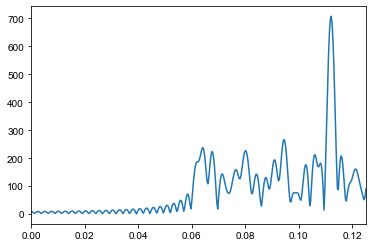

In [73]:
plt.plot(fL,np.abs(np.fft.fft(data)))
plt.xlim([0,1/8])


(0.05, 0.2)

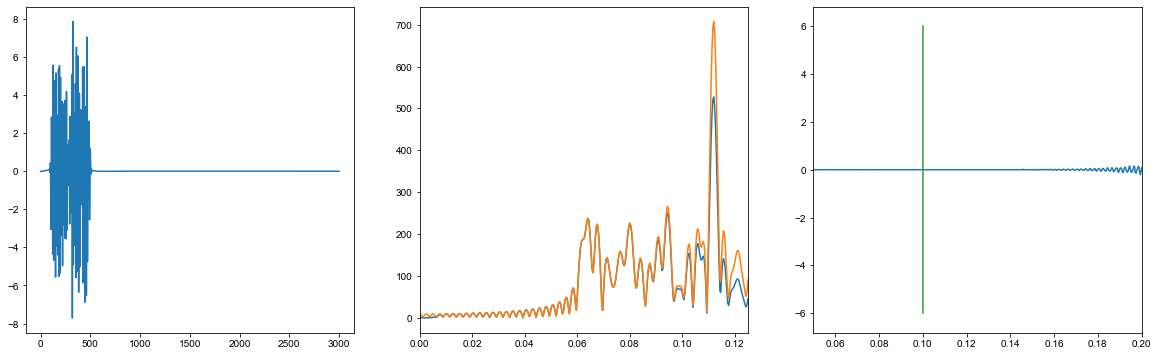

In [77]:
b0,a0=signal.butter(4,[1/160,1/8],fs=fs,btype='bandpass')
data0=signal.filtfilt(b0,a0,data)
plt.figure(figsize=[20,6])
plt.subplot(1,3,1)
plt.plot(data0)
plt.subplot(1,3,2)
plt.plot(fL,np.abs(np.fft.fft(data0)))
plt.plot(fL,np.abs(np.fft.fft(data)))
plt.xlim([0,1/8])
plt.subplot(1,3,3)
plt.plot(fL,np.angle(np.fft.fft(data0))-np.angle(np.fft.fft(data)))
plt.plot([1/160,1/160],[-6,6])
plt.plot([1/10,1/10],[-6,6])
#plt.plot(fL,np.angle(np.fft.fft(data)))
plt.xlim([1/20,1/5])